### Q. Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

import statsmodels.formula.api as smf

## 2. Import data Or Data Collection

In [2]:
startups_data = pd.read_csv(r"E:\Data Science by John\Assignments\Assignment 5- Multi Linear Regression\50_Startups.csv")
startups_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## 3. Data Understanding

### 3.1 Perform Initial Analysis

In [3]:
startups_data.shape

(50, 5)

In [4]:
startups_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
startups_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
startups_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
startups_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## 3.2 Assumptions Check

### 1. Linearity Check

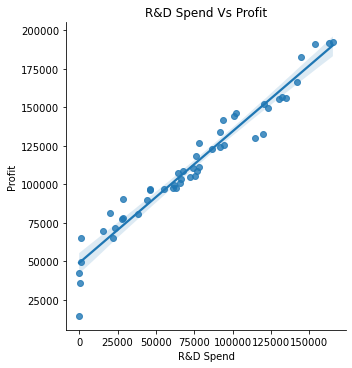

In [8]:
sns.lmplot(x="R&D Spend", y="Profit", data=startups_data)
plt.title("R&D Spend Vs Profit")
plt.show()

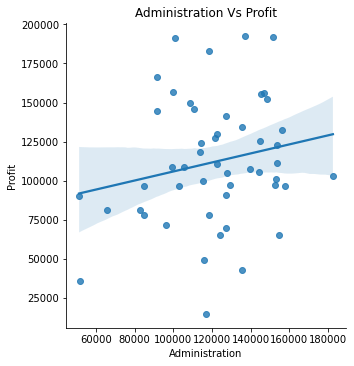

In [9]:
sns.lmplot(x="Administration", y="Profit", data=startups_data)
plt.title("Administration Vs Profit")
plt.show()

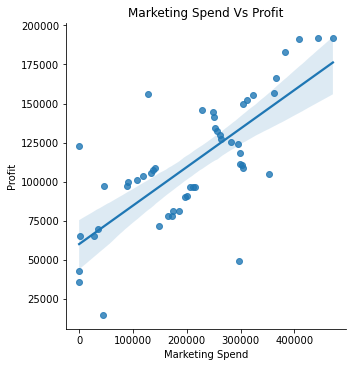

In [10]:
sns.lmplot(x="Marketing Spend", y="Profit", data=startups_data)
plt.title("Marketing Spend Vs Profit")
plt.show()

### Linearity Test is Failed

### 2. Normality Test

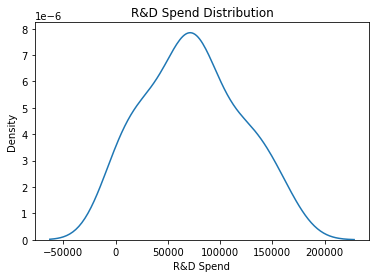

In [11]:
sns.kdeplot(data = startups_data, x='R&D Spend')
plt.title('R&D Spend Distribution')
plt.show()

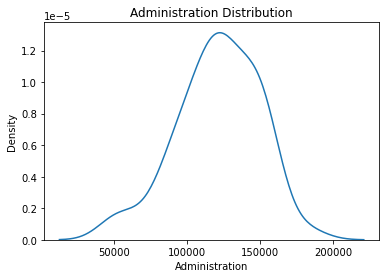

In [12]:
sns.kdeplot(x=startups_data['Administration'])
plt.title('Administration Distribution')
plt.show()

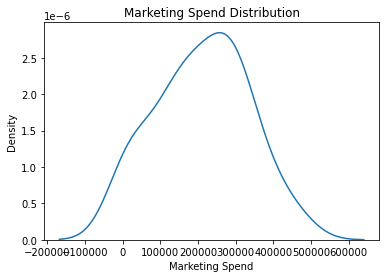

In [13]:
sns.kdeplot(x=startups_data['Marketing Spend'])
plt.title('Marketing Spend Distribution')
plt.show()

### Normality Test is Failed

### 3. No AutoRegression : No any feature is in DataTime data format so this test is passed

### 4. Multicollinearity

### 4.1 Correlation Matrix

In [14]:
corr_matrix = startups_data.corr().round(2)
corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.00,0.24,0.72,0.97
Administration,0.24,1.00,-0.03,0.20
Marketing Spend,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


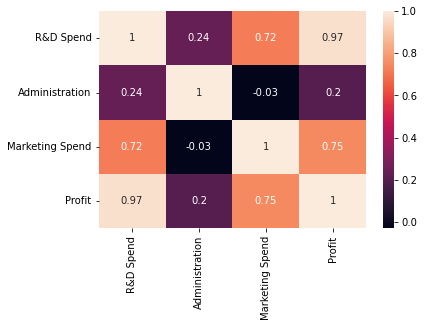

In [15]:
sns.heatmap(data = corr_matrix,annot = True)
plt.show()

### MultiCollinearity Test is Failed 
There is multicollinearity in the inputs in our data. 

### 5. Homoscedasticity Check II 6. Zero Residual Check
This will be performed post Model Training beacuse we need the errors

## 4. Data Preparation

In [16]:
startups_data.drop(labels = ["State"], axis = 1,inplace = True)

## 5. Model Building

In [17]:
x = startups_data.drop("Profit",axis=1)
y = startups_data[["Profit"]]

##  6. Model Training

In [18]:
linear_model = LinearRegression()

In [19]:
linear_model.fit(x,y)

LinearRegression()

In [20]:
linear_model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [21]:
linear_model.intercept_

array([50122.19298987])

## 7. Model Testing

In [22]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [23]:
y_pred = linear_model.predict(x)
y_pred

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327],
       [163580.7805712 ],
       [158114.09666865],
       [160021.36304781],
       [151741.69969865],
       [154884.68410995],
       [135509.01636714],
       [135573.71296074],
       [129138.05418243],
       [127487.99166275],
       [149548.64633453],
       [146235.1599852 ],
       [116915.40540144],
       [130192.44720781],
       [129014.2268059 ],
       [115635.21636716],
       [116639.6692309 ],
       [117319.45164029],
       [114706.98171695],
       [109996.61522126],
       [113362.96611314],
       [102237.72506481],
       [110600.5753503 ],
       [114408.07145684],
       [101660.02600497],
       [101794.98345176],
       [ 99452.37293606],
       [ 97687.85627575],
       [ 99001.32898549],
       [ 97915.00780465],
       [ 89039.27374116],
       [ 90511.59956753],
       [ 75286.17458546],
       [ 89619.5377079 ],
       [ 696

## 8. Model Evaluation

In [24]:
error = y - y_pred
error

,Profit
0,-259.422890
1,2635.291768
2,8903.110904
3,9205.289974
4,-5951.574183
5,-6589.660571
6,-1991.586669
7,-4268.763048
8,470.070301
9,-5124.724110


## .....back to Assumption Check

## 5. Homoscedasticity Check

In [25]:
x

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [26]:
std_scaler = StandardScaler()
scaled_x = std_scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x,columns=['R&D Spend','Administration','Marketing Spend'])
scaled_x

,R&D Spend,Administration,Marketing Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528
5,1.279800,-0.776239,1.254210
6,1.340066,0.932147,-0.688150
7,1.245057,0.871980,0.932186
8,1.030369,0.986952,0.830887
9,1.091819,-0.456640,0.776107


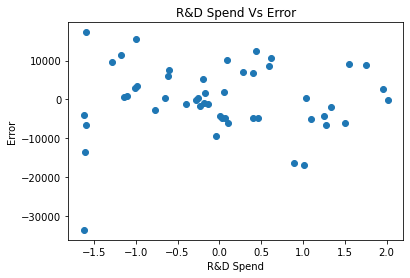

In [27]:
plt.scatter(x=scaled_x['R&D Spend'],y=error)
plt.title('R&D Spend Vs Error')
plt.xlabel('R&D Spend')
plt.ylabel('Error')
plt.show()

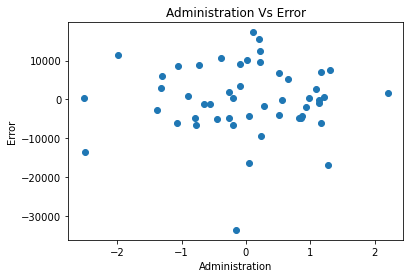

In [28]:
plt.scatter(x=scaled_x['Administration'],y=error)
plt.title('Administration Vs Error')
plt.xlabel('Administration')
plt.ylabel('Error')
plt.show()

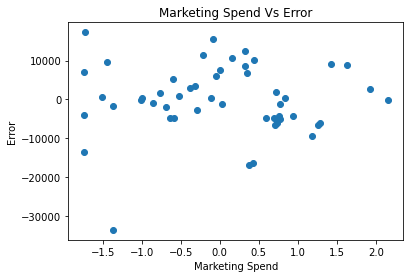

In [29]:
plt.scatter(x=scaled_x['Marketing Spend'],y=error)
plt.title('Marketing Spend Vs Error')
plt.xlabel('Marketing Spend')
plt.ylabel('Error')
plt.show()

### Homoscedasticity Test is Failed

## 6. Zero Residual Mean Across the Fitted Line

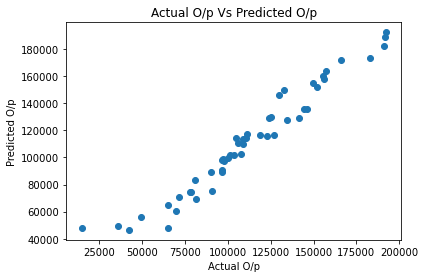

In [30]:
plt.scatter(x=y,y=y_pred)
plt.title('Actual O/p Vs Predicted O/p')
plt.xlabel('Actual O/p')
plt.ylabel('Predicted O/p')
plt.show()

### Zero Residual Mean Test is also Failed

# Build Linear Regression using StatsModels 

In [31]:
startups_data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [32]:
startups_data.rename(columns = ({'R&D Spend':'R&D_Spend','Marketing Spend':'Marketing_Spend'}),inplace=True)
startups_data.head()

,R&D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [33]:
linear_model_stats = smf.ols('Profit~Marketing_Spend + Administration + Q("R&D_Spend")',data = startups_data).fit()


## 8.1 Evaluation Metrics of Linear Regression

In [34]:
print('R2Score     :',linear_model_stats.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats.aic.round(4))
print('BIC Value   :',linear_model_stats.bic.round(4))
print('P-Value     :\n',linear_model_stats.pvalues)

R2Score     : 0.9507
Adj.R2Score : 0.9475
AIC Value   : 1058.7715
BIC Value   : 1066.4196
P-Value     :
 Intercept          1.057379e-09
Marketing_Spend    1.047168e-01
Administration     6.017551e-01
Q("R&D_Spend")     2.634968e-22
dtype: float64


In [35]:
linear_model_stats_1 = smf.ols('Profit~Q("R&D_Spend")',data = startups_data).fit()
print('R2Score     :',linear_model_stats_1.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats_1.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_1.aic.round(4))
print('BIC Value   :',linear_model_stats_1.bic.round(4))
print('P-Value     :\n',linear_model_stats_1.pvalues)

R2Score     : 0.9465
Adj.R2Score : 0.9454
AIC Value   : 1058.873
BIC Value   : 1062.6971
P-Value     :
 Intercept         2.782697e-24
Q("R&D_Spend")    3.500322e-32
dtype: float64


In [36]:
linear_model_stats_2 = smf.ols('Profit~Q("R&D_Spend")+ Administration',data = startups_data).fit()
print('R2Score     :',linear_model_stats_2.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats_2.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_2.aic.round(4))
print('BIC Value   :',linear_model_stats_2.bic.round(4))
print('P-Value     :\n',linear_model_stats_2.pvalues)

R2Score     : 0.9478
Adj.R2Score : 0.9456
AIC Value   : 1059.6637
BIC Value   : 1065.3998
P-Value     :
 Intercept         5.695336e-12
Q("R&D_Spend")    2.278348e-31
Administration    2.888932e-01
dtype: float64


In [37]:
linear_model_stats_3 = smf.ols('Profit~Marketing_Spend + Q("R&D_Spend")',data = startups_data).fit()
print('R2Score     :',linear_model_stats_3.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats_3.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_3.aic.round(4))
print('BIC Value   :',linear_model_stats_3.bic.round(4))
print('P-Value     :\n',linear_model_stats_3.pvalues)

R2Score     : 0.9505
Adj.R2Score : 0.9483
AIC Value   : 1057.0708
BIC Value   : 1062.8068
P-Value     :
 Intercept          3.504062e-22
Marketing_Spend    6.003040e-02
Q("R&D_Spend")     6.040433e-24
dtype: float64


In [38]:
linear_model_stats_4 = smf.ols('Profit~Marketing_Spend + Administration',data = startups_data).fit()
print('R2Score     :',linear_model_stats_4.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats_4.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_4.aic.round(4))
print('BIC Value   :',linear_model_stats_4.bic.round(4))
print('P-Value     :\n',linear_model_stats_4.pvalues)

R2Score     : 0.6097
Adj.R2Score : 0.5931
AIC Value   : 1160.2648
BIC Value   : 1166.0009
P-Value     :
 Intercept          2.589341e-01
Marketing_Spend    9.727245e-11
Administration     1.729198e-02
dtype: float64


In [39]:
linear_model_stats = smf.ols('Profit~Marketing_Spend + Administration + Q("R&D_Spend")',data = startups_data).fit()
print('R2Score     :',linear_model_stats.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats.aic.round(4))
print('BIC Value   :',linear_model_stats.bic.round(4))
print('P-Value     :\n',linear_model_stats.pvalues)

R2Score     : 0.9507
Adj.R2Score : 0.9475
AIC Value   : 1058.7715
BIC Value   : 1066.4196
P-Value     :
 Intercept          1.057379e-09
Marketing_Spend    1.047168e-01
Administration     6.017551e-01
Q("R&D_Spend")     2.634968e-22
dtype: float64


In [40]:
mean_squared_error(y,y_pred)

78417126.01913083

In [41]:
mean_absolute_error(y,y_pred)

6471.450396104808

## 9. MODEL OPTIMIZATION

In [42]:
startups_data_2 = startups_data.copy()
startups_data_2.head()

,R&D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [43]:
startups_data_2['log_R&D_Spend']      = np.log(startups_data_2['R&D_Spend'])
startups_data_2['log_Administration'] = np.log(startups_data_2['Administration'])
startups_data_2['log_Marketing_Spend']= np.log(startups_data_2['Marketing_Spend'])
startups_data_2.head()

,R&D_Spend,Administration,Marketing_Spend,Profit,log_R&D_Spend,log_Administration,log_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849


## 3.2 Assumptions Check

### 1. Linearity Check

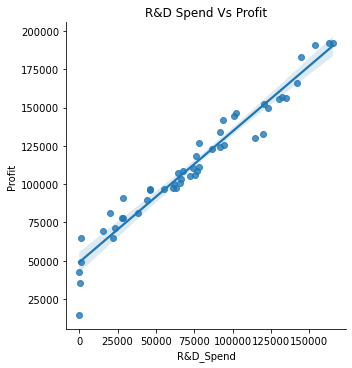

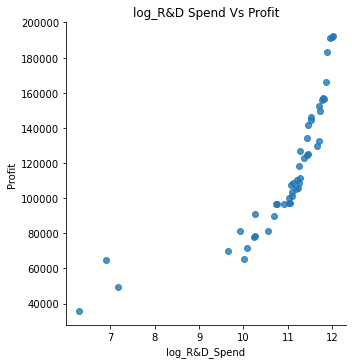

In [44]:
sns.lmplot(x="R&D_Spend", y="Profit", data=startups_data_2)
plt.title("R&D Spend Vs Profit")

sns.lmplot(x="log_R&D_Spend", y="Profit", data=startups_data_2)
plt.title("log_R&D Spend Vs Profit")
plt.show()

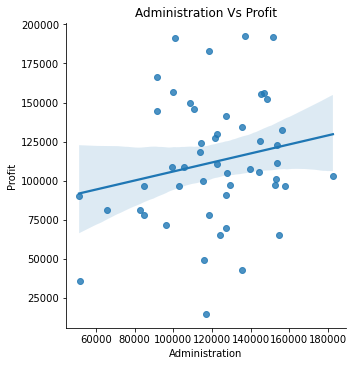

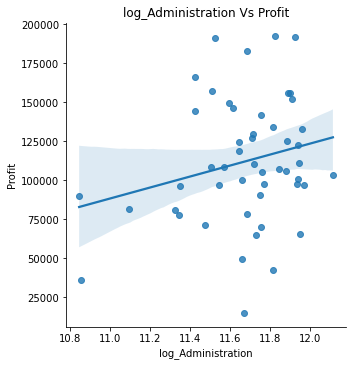

In [45]:
sns.lmplot(x="Administration", y="Profit", data=startups_data_2)
plt.title("Administration Vs Profit")

sns.lmplot(x="log_Administration", y="Profit", data=startups_data_2)
plt.title("log_Administration Vs Profit")
plt.show()

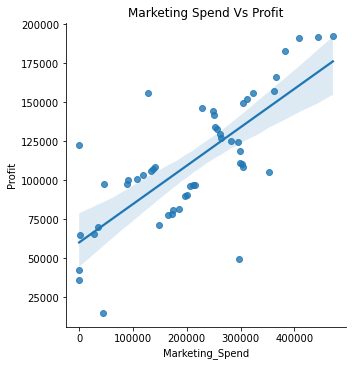

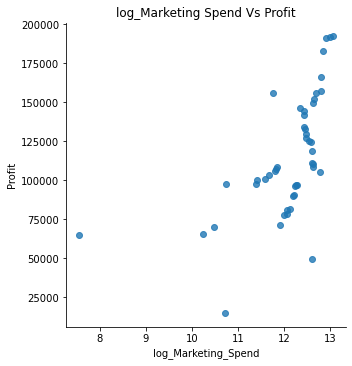

In [46]:
sns.lmplot(x="Marketing_Spend", y="Profit", data=startups_data_2)
plt.title("Marketing Spend Vs Profit")

sns.lmplot(x="log_Marketing_Spend", y="Profit", data=startups_data_2)
plt.title("log_Marketing Spend Vs Profit")
plt.show()

### Linearity Test is Failed

### 2. Normality Test

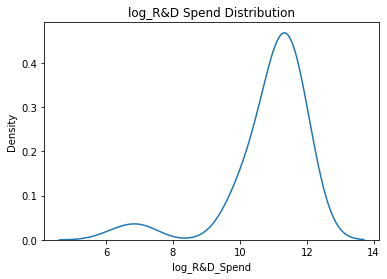

In [47]:
sns.kdeplot(data = startups_data_2, x='log_R&D_Spend')
plt.title('log_R&D Spend Distribution')
plt.show()

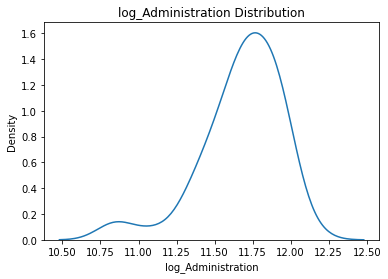

In [48]:
sns.kdeplot(x=startups_data_2['log_Administration'])
plt.title('log_Administration Distribution')
plt.show()

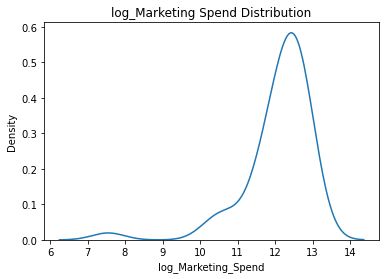

In [49]:
sns.kdeplot(x=startups_data_2['log_Marketing_Spend'])
plt.title('log_Marketing Spend Distribution')
plt.show()

### Normality Test is Failed

## Model Building || Training || Evaluation using Statsmodels

In [50]:
linear_model_stats_5 = smf.ols('Profit~log_Administration',data = startups_data_2).fit()
print('R2Score     :',linear_model_stats_5.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats_5.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_5.aic.round(4))
print('BIC Value   :',linear_model_stats_5.bic.round(4))
print('P-Value     :\n',linear_model_stats_5.pvalues)

R2Score     : 0.054
Adj.R2Score : 0.0343
AIC Value   : 1202.5319
BIC Value   : 1206.3559
P-Value     :
 Intercept             0.234300
log_Administration    0.104253
dtype: float64


### After transformation model performance is not so good.

## 10. Model Finalization & Model Testing

In [51]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [54]:
X_test = pd.DataFrame(data=startups_data.drop(["Profit","Administration"],axis=1))
X_test.head()

,R&D_Spend,Marketing_Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [56]:
y_pred_stat_3 = linear_model_stats_3.predict(X_test)
y_pred_stat_3.head()

0    192800.458625
1    189774.659480
2    181405.378097
3    173441.308842
4    171127.623218
dtype: float64